In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import pandas as pd

In [3]:
IMAGE_FOLDER_PATH=r"C:\Users\ricar\Documents\4Geeks_Projects\Image-Procesing\data\train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

In [4]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [6]:
dataset.head()

,image_path,target
0,C:\Users\ricar\Documents\4Geeks_Projects\Image...,cat
1,C:\Users\ricar\Documents\4Geeks_Projects\Image...,cat
2,C:\Users\ricar\Documents\4Geeks_Projects\Image...,cat
3,C:\Users\ricar\Documents\4Geeks_Projects\Image...,cat
4,C:\Users\ricar\Documents\4Geeks_Projects\Image...,cat


In [7]:
dataset['target'].value_counts()

target
cat    12500
dog    12500
Name: count, dtype: int64

In [8]:
dataset = dataset[dataset['target'].isin(['dog', 'cat'])]

In [9]:
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


In [10]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [19]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Flatten, Conv2D

model = Sequential()
model.add(Conv2D(input_shape=(WIDTH, HEIGHT, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [20]:
from keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [21]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test=train_test_split(dataset, test_size=0.2, random_state=42)


In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator = train_datagen.flow_from_dataframe(
    dataframe=dataset_train,
    x_col="image_path",
    y_col="target",
    target_size=(WIDTH, HEIGHT),
    class_mode="categorical",
    batch_size=150
)

Found 20000 validated image filenames belonging to 2 classes.


In [23]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_datagenerator = test_datagen.flow_from_dataframe(
    dataframe=dataset_test,
    x_col="image_path",
    y_col="target",
    target_size=(WIDTH, HEIGHT),
    class_mode="categorical",
    batch_size=150
)

Found 5000 validated image filenames belonging to 2 classes.


In [24]:
modelHistory = model.fit(
    train_datagenerator,
    epochs=2,
    validation_data=test_datagenerator,
    validation_steps=dataset_test.shape[0]//150, 
    steps_per_epoch=dataset_train.shape[0]//150
)

Epoch 1/2
133/133 [==============================] - 2065s 16s/step - loss: 0.6696 - accuracy: 0.5690 - val_loss: 0.6860 - val_accuracy: 0.6026
Epoch 2/2
133/133 [==============================] - 2009s 15s/step - loss: 0.6199 - accuracy: 0.6501 - val_loss: 0.6375 - val_accuracy: 0.6457


In [25]:
model.save("model.h5")


c:\Users\ricar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


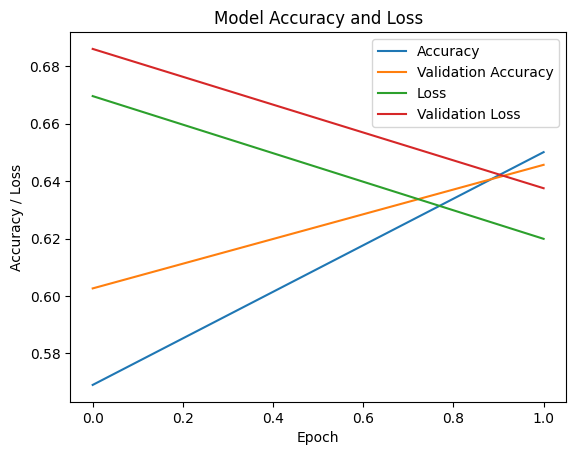

In [27]:
plt.plot(modelHistory.history["accuracy"])
plt.plot(modelHistory.history["val_accuracy"])
plt.plot(modelHistory.history["loss"])
plt.plot(modelHistory.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy and Loss")
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Show the Plot
plt.show()

In [31]:
predictions = model.predict(test_datagenerator)


34/34 [==============================] - 107s 3s/step
